In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

truck


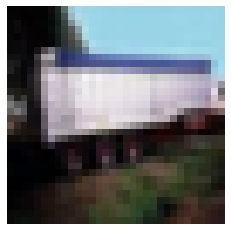

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,50000-1)
plt.axis("off")
#trans[0] → "airplane"
catergory = y_train[c][0]
print(trans[catergory])
plt.imshow(x_train[c])

In [5]:
#資料預處理
# 1.題目預處理(Normalize常態化)
#Keras在準備隨機那組weights,跟Normalize的圖片比較搭
#第一種方式:0~1 第二種方式-1~1
#卷積不需要攤開，直接進去
x_train_shape = x_train / 255
x_test_shape = x_test / 255
#Demo
x_train_shape[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
#2.答案預處理(One-Hot-Encoding)
#跟上次一模一樣
#希望的樣子:[P0,P1,....,P9]
#5:[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#Demo
print("原來:",y_train[1])
print("後來:",y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
from tensorflow.keras.models import Sequential
#MLP
from tensorflow.keras.layers import Dense,Flatten
#Convolution 卷積
from tensorflow.keras.layers import Conv2D,MaxPooling2D
cnn = Sequential()
#(一個過濾器)3*3*3*(filter數目)32+(bias)32=896
cnn.add(Conv2D(32,(3,3),
               input_shape=(32,32,3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
#(一個過濾器)3*3*32*(filter數目)64+(bias)64=18496
cnn.add(Conv2D(64,(3,3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(128,(3,3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(256,activation="relu"))
cnn.add(Dense(10,activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0